# Titanic

In [69]:
import numpy as np
import pandas as pd

test = pd.read_csv('test.csv').drop(['Name', 'Cabin'], axis=1)
train = pd.read_csv('train.csv').drop(['Name', 'Cabin'], axis=1)

train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,female,35.0,1,0,113803,53.1000,S
4,5,0,3,male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,211536,13.0000,S
887,888,1,1,female,19.0,0,0,112053,30.0000,S
888,889,0,3,female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,male,26.0,0,0,111369,30.0000,C


## Preprocessing

<AxesSubplot:>

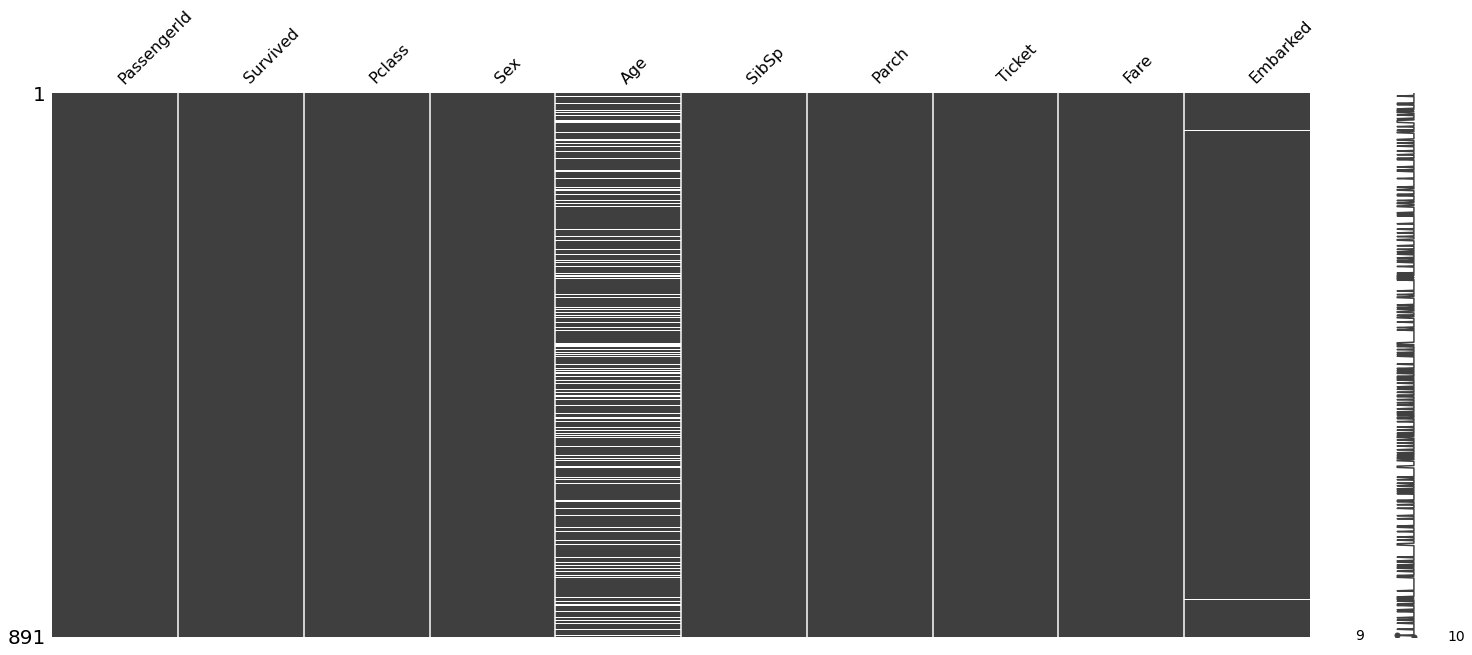

In [70]:
import missingno as msno

msno.matrix(train)

In [71]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

num_attribs = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
string_attributes =  ['Sex', 'Embarked']

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(missing_values=np.nan, strategy='mean')),
        ('std_scaler', StandardScaler()),
    ])

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), string_attributes),
    ])  

X_train = full_pipeline.fit_transform(X)

df_X_train = pd.DataFrame(X_train, index=X.index)
df_X_train

,0,1,2,3,4,5,6,7,8,9
0,0.827377,-0.580044,0.432793,-0.473674,-0.502445,0.0,1.0,0.0,0.0,1.0
1,-1.566107,0.650112,0.432793,-0.473674,0.786845,1.0,0.0,1.0,0.0,0.0
2,0.827377,-0.272505,-0.474545,-0.473674,-0.488854,1.0,0.0,0.0,0.0,1.0
3,-1.566107,0.419458,0.432793,-0.473674,0.420730,1.0,0.0,0.0,0.0,1.0
4,0.827377,0.419458,-0.474545,-0.473674,-0.486337,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
886,-0.369365,-0.195620,-0.474545,-0.473674,-0.386671,0.0,1.0,0.0,0.0,1.0
887,-1.566107,-0.810699,-0.474545,-0.473674,-0.044381,1.0,0.0,0.0,0.0,1.0
888,0.827377,-0.041851,0.432793,2.008933,-0.176263,1.0,0.0,0.0,0.0,1.0
889,-1.566107,-0.272505,-0.474545,-0.473674,-0.044381,0.0,1.0,1.0,0.0,0.0


<AxesSubplot:>

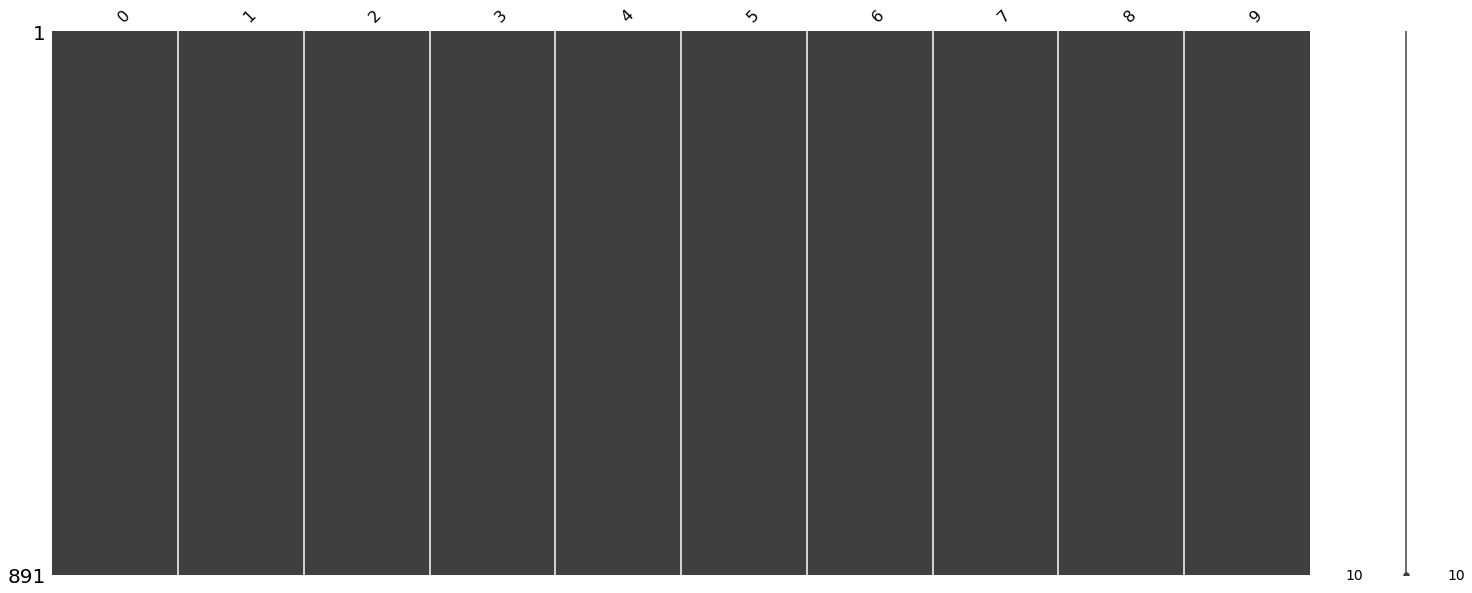

In [72]:
msno.matrix(df_X_train)

## Training

In [73]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)

In [74]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y, cv=3)

In [83]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y, y_train_pred)

array([[463,  86],
       [122, 220]], dtype=int64)

In [79]:
from sklearn.metrics import precision_score, recall_score
precision_score(y, y_train_pred)

0.7189542483660131

In [81]:
recall_score(y, y_train_pred)

0.6432748538011696

In [84]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

y_train_pred = cross_val_predict(log_reg, X_train, y, cv=3)

confusion_matrix(y, y_train_pred)

array([[465,  84],
       [103, 239]], dtype=int64)

In [85]:
precision_score(y, y_train_pred)

0.739938080495356

In [86]:
recall_score(y, y_train_pred)

0.6988304093567251